In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), done.


In [ ]:
!ls german-traffic-signs
#pickle file: object serialized before writing to file. Convert objects to charachter stream
#unpickle: De-serialized 

signnames.csv  test.p  train.p	valid.p


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout,Dense, Conv2D,MaxPooling2D,Flatten

In [ ]:
np.random.seed(0)

In [ ]:
import pickle 

In [ ]:
# execute two operations as a pair and call code in between
with open('german-traffic-signs/train.p','rb') as f:
  #Unpickled: Dictionary of data
  train_data = pickle.load(f)

with open('german-traffic-signs/valid.p','rb') as f:
  val_data = pickle.load(f)

with open('german-traffic-signs/test.p','rb') as f:
  test_data = pickle.load(f)

print(type(train_data))

<class 'dict'>


In [ ]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
y_train.shape

(34799,)

In [ ]:
assert(X_train.shape[0] == y_train.shape[0])," Number of Train images != Number of Train labels"
assert(X_val.shape[0] == y_val.shape[0])," Number of Val images != Number of Val labels"
assert(X_test.shape[0] == y_test.shape[0])," Number of Test images != Number of Test labels"

assert(X_train.shape[1:] == (32,32,3))," Dimension of Train images != 32x32x3"
assert(X_test.shape[1:] == (32,32,3))," Dimension of Test images != 32x32x3"
assert(X_val.shape[1:] == (32,32,3))," Dimension of Val images != 32x32x3"

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

In [ ]:
import random

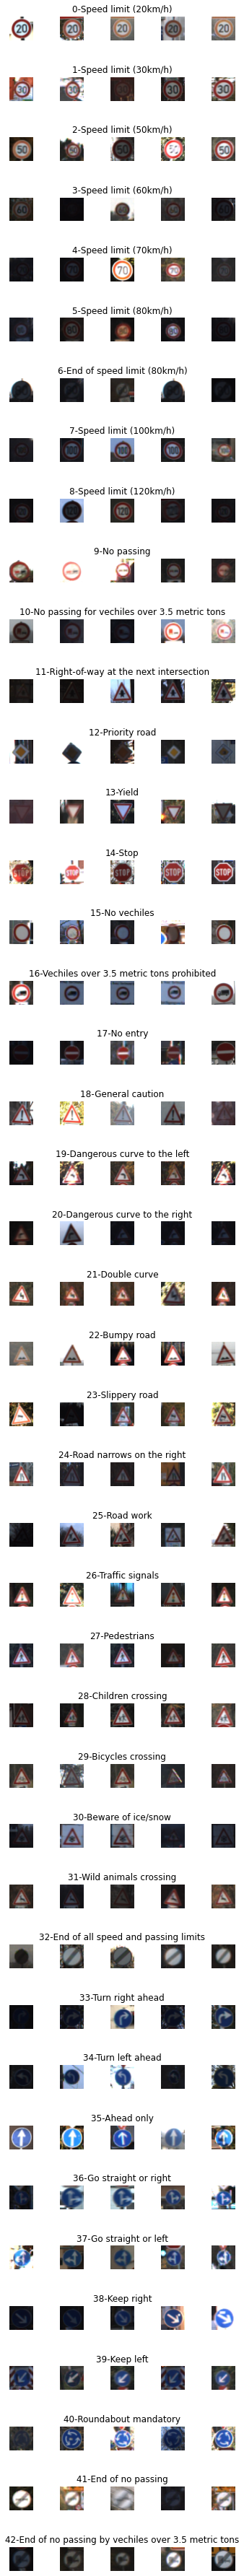

In [ ]:
num_of_samples = []

cols = 5
num_classes = 43

fig,axs = plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,50))
fig.tight_layout()

for i in range(cols):
  # iterate of dataset rows as index and series pairs
  for j,row in data.iterrows():
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:],cmap='gray')
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j) + '-' + row["SignName"])
      num_of_samples.append(len(x_selected)) 

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

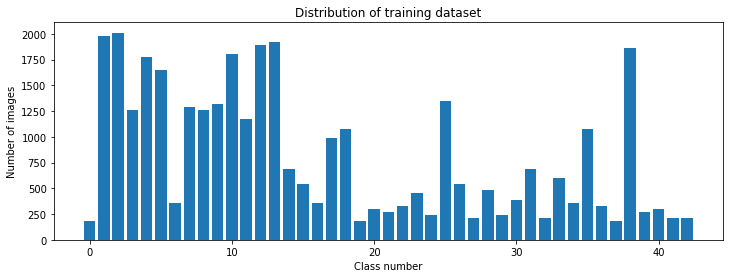

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [ ]:
print('Max: Category',num_of_samples.index(max(num_of_samples)),'with ',max(num_of_samples),'images')
print('Min: Category',num_of_samples.index(min(num_of_samples)),'with ',min(num_of_samples),'images')

Max: Category 2 with  2010 images
Min: Category 0 with  180 images


In [ ]:
import cv2

(32, 32, 3)
36


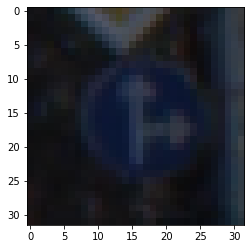

In [ ]:
plt.imshow(X_train[1000])
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


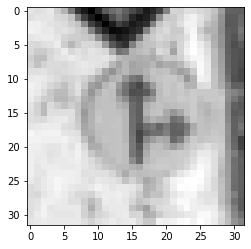

In [ ]:
# Preprocessing: Convert images to grayscale
# Color is not significant: Lighting changes, color is similar
# Matters: edges, curves, shapes etc
# Depth: 3-> 1 (network requires less parameters. Network = more efficient and less computation power)
def grayscale(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

img = cv2.bitwise_not(grayscale(X_train[1000]))
plt.imshow(img,cmap='gray')
print(img.shape)

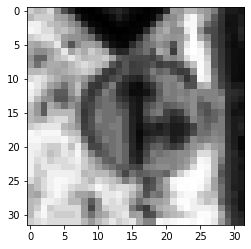

In [ ]:
# Histogram equalization: Standardize (normalize) lighting in all images
# Histogram spreads out lighting across image. Flattens image histogram (re-assigns gray values in image)
def equalize(img):
  # Only accepts grayscale (no depth)
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)
plt.imshow(img,cmap='gray')

In [ ]:
def preprocessing(img):
  img = cv2.bitwise_not(grayscale(img))
  img = equalize(img)
  img = img / 255

  return img

# Map returns list
X_train = np.array(list(map(preprocessing,X_train)))
X_val = np.array(list(map(preprocessing,X_val)))
X_test = np.array(list(map(preprocessing,X_test)))

(34799, 32, 32)


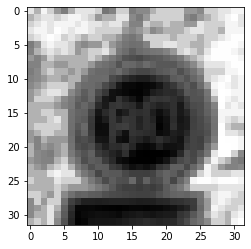

In [ ]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)],cmap='gray')
print(X_train.shape)

In [ ]:
X_train = X_train.reshape(34799,32,32,1)
X_val = X_val.reshape(4410,32,32,1)
X_test = X_test.reshape(12630,32,32,1)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Width shift range: Horizontal translation
# Height shift range: Vertical translation
# Zoom range: Zoom in or out of image
# Shear range: Magnitude of shear angle in degrees
# Rotation range: Rotates image by certain value of degrees

datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range = 0.2,
                            shear_range=0.1,
                            rotation_range=10)

# Creates augmented batche of images when requested
datagen.fit(X_train)

(15, 32, 32, 1)


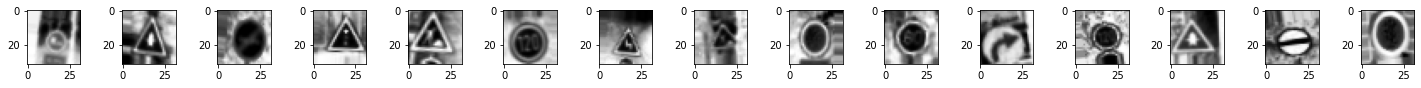

In [ ]:
# Iterator that stores batche of 20 images along with their labels
batches = datagen.flow(X_train,y_train,batch_size=15)
X_batch,y_batch = next(batches)
print(X_batch.shape)
fig, axs = plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32),cmap='gray')


In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [ ]:
y_train = to_categorical(y_train,43)
y_val = to_categorical(y_val,43)
y_test = to_categorical(y_test,43)

In [ ]:
def cnn_model():
  model = Sequential()
  
  # No need to contain borders since objects are in center
  # 5x5x60 + 60
  model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))
  model.add(Conv2D(60,(3,3),activation='relu'))
  # Scales down feature maps -> Generalized maps: 14x14
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  # 15x30x3x3 + 30
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  #model.add(Dropout(0.5))
  
  # From nD -> 1D array of shape 540 (6x6x50)
  model.add(Flatten())

  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(num_classes,activation='softmax'))

  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

  return model

In [ ]:
model = cnn_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 60)        32460     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 480)               0

In [ ]:
# Steps per epoch = length of training dataset / batch size
print(int(len(X_train)/50))

695


In [ ]:
# 695 batches * 50 images per batch = 34,750 imges per epoch
history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=50),steps_per_epoch=695,epochs=10,validation_data=(X_val,y_val),shuffle=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
695/695 [==============================] - 46s 19ms/step - loss: 2.4104 - accuracy: 0.3390 - val_loss: 0.1998 - val_accuracy: 0.9354
Epoch 2/10
695/695 [==============================] - 13s 18ms/step - loss: 0.5277 - accuracy: 0.8387 - val_loss: 0.1192 - val_accuracy: 0.9626
Epoch 3/10
695/695 [==============================] - 13s 18ms/step - loss: 0.3297 - accuracy: 0.8978 - val_loss: 0.0870 - val_accuracy: 0.9728
Epoch 4/10
695/695 [==============================] - 13s 18ms/step - loss: 0.2404 - accuracy: 0.9264 - val_loss: 0.0624 - val_accuracy: 0.9807
Epoch 5/10
695/695 [==============================] - 13s 18ms/step - loss: 0.1941 - accuracy: 0.9410 - val_loss: 0.0394 - val_accuracy: 0.9887
Epoch 6/10
695/695 [==============================] - 13s 18ms/step - loss: 0.1609 - accuracy: 0.9504 - val_loss: 0.0426 - val_accuracy: 0.9878
Epoch 7/10
695/695 [==============================] - 13s 19ms/step - loss: 0.1397 - accuracy: 0.9570 - val_loss: 0.0405 - val_accuracy:

Text(0.5, 0, 'Epoch')

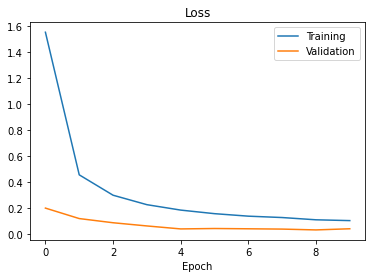

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

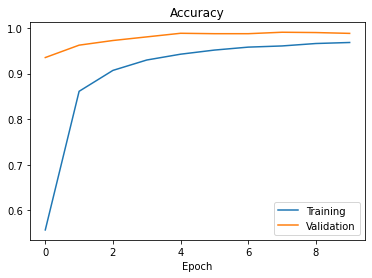

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('Epoch')

In [ ]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test score: ',score[0])
print('Test accuracy: ',score[1])

Test score:  0.12203246355056763
Test accuracy:  0.9695170521736145


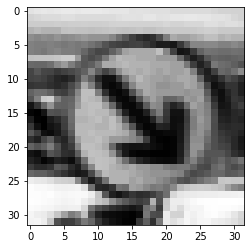

In [ ]:
j = 2
img = X_test[j].reshape(32,32)
plt.imshow(img,cmap='gray')

In [ ]:
img = img.reshape(1,32,32,1)

In [ ]:
print('Probabilities for all classes: ',model.predict(img))
print('Predicted sign: ',np.argmax(model.predict(img)[0],-1))
actual_sign = y_test[j].tolist()
print('Actual sign: ',actual_sign.index(1))

Probabilities for all classes:  [[1.2667819e-32 3.0542013e-26 6.1824792e-24 2.8622603e-25 4.1238954e-29
  1.1064077e-18 2.3640841e-28 5.8039535e-26 1.0552843e-30 5.1822182e-30
  2.1872374e-21 1.5986637e-18 5.5932899e-14 1.1827099e-23 2.9868246e-24
  4.3326235e-26 7.3956957e-34 2.5864424e-22 4.3824331e-22 7.9169480e-34
  1.0352812e-20 5.3707962e-24 3.9864791e-29 9.9738655e-31 4.4956705e-26
  1.2551138e-30 2.4272767e-27 1.0591892e-28 1.8901818e-30 3.1683613e-28
  4.9973145e-25 9.3491281e-22 1.4812880e-26 3.1669365e-35 2.8773010e-18
  4.7681022e-27 3.4798845e-20 7.6533077e-36 1.0000000e+00 1.2663635e-29
  6.0895878e-21 3.2401128e-33 1.2167193e-25]]
Predicted sign:  38
Actual sign:  38


In [ ]:
 model.save('traffic_signs_model.h5')
 

In [ ]:
from google.colab import files


In [ ]:
files.download('traffic_signs_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>